<a href="https://colab.research.google.com/github/jihyunjeongme/data-science/blob/master/prophet%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%95%84%EB%B3%B4%EC%B9%B4%EB%8F%84_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고
- https://www.youtube.com/watch?v=C_MOtffSues&list=PL-xmlFOn6TUKlWNQ1_jikNWCdRUO3MBJm
- **Dataset**
  - https://github.com/kairess/forecast_avocado_prices
- **prophet**
  - Tool for producing high quality forecasts for time series data that has multiple seasonality with linear or non-linear growth. https://facebook.github.io/prophet
  - https://github.com/facebook/prophet
  
## Dataset
- Avocado Prices
- https://www.kaggle.com/neuromusic/avocado-prices





In [1]:
# 데이터 세트 불러오기

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/Colab Notebooks/dataanalysis/practice/pridiction_avocado_prices

/content/gdrive/My Drive/Colab Notebooks/dataanalysis/practice/pridiction_avocado_prices


In [0]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from fbprophet import Prophet

In [7]:
# Dataset period: 2015-01-04 ~ 2018-03-25

df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
# 우리는 여기서 Date(날짜), AveragePrice(평균가격)를 사용
# Total Volume: 그날 팔린 전체 갯수
# 4046, 4225, 4770: 아보카도 품좀

In [9]:
# 대략적인 데이터 분석

df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# Types

df.groupby('type').mean()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [0]:
# conventional, organic 두 종류가 있음
# 여기서는 conventional 가격만 예측함.

In [18]:
# Preprocess(전처리)

df = df.loc[(df.type ==  'conventional') & (df.region == 'TotalUS')]

# string으로 된 날짜를 날짜 형식으로 타입을 바꿔줌
df['Date'] == pd.to_datetime(df['Date'])

# 날짜에 따른 평균가격만 예측, 인덱스 초기화
data = df[['Date', 'AveragePrice']].reset_index(drop=True)

# 컬럼이름 변경
data = data.rename(columns={'Date':'ds', 'AveragePrice':'y'})

data.head()
                                               

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


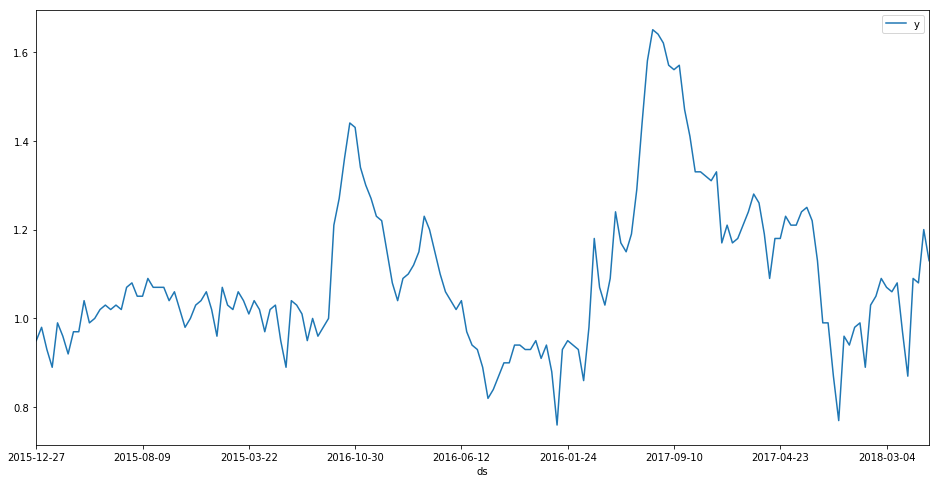

In [20]:
# 시각화

data.plot(x='ds', y='y', figsize=(16,8))

In [21]:
# Fit

# prophet Quick Start: https://facebook.github.io/prophet/docs/quick_start.html#python-api

model = Prophet()

model.fit(data)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
# Predict

# 앞으로 365뒤를 예측하겠다.
future = model.make_future_dataframe(periods=365) 

# 앞으로 365의 데이터를 예측
forecast = model.predict(future)

# 끝의 5개
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.175446,0.978913,1.246497,1.109105,1.244454,-0.059409,-0.059409,-0.059409,-0.059409,-0.059409,-0.059409,0.0,0.0,0.0,1.116037
530,2019-03-22,1.175342,0.990442,1.243533,1.108703,1.244566,-0.057987,-0.057987,-0.057987,-0.057987,-0.057987,-0.057987,0.0,0.0,0.0,1.117355
531,2019-03-23,1.175237,0.988861,1.248994,1.108242,1.244747,-0.056090,-0.056090,-0.056090,-0.056090,-0.056090,-0.056090,0.0,0.0,0.0,1.119147
532,2019-03-24,1.175133,0.985800,1.254987,1.107825,1.245015,-0.053734,-0.053734,-0.053734,-0.053734,-0.053734,-0.053734,0.0,0.0,0.0,1.121399
533,2019-03-25,1.175029,0.993831,1.247752,1.107653,1.245283,-0.050950,-0.050950,-0.050950,-0.050950,-0.050950,-0.050950,0.0,0.0,0.0,1.124078


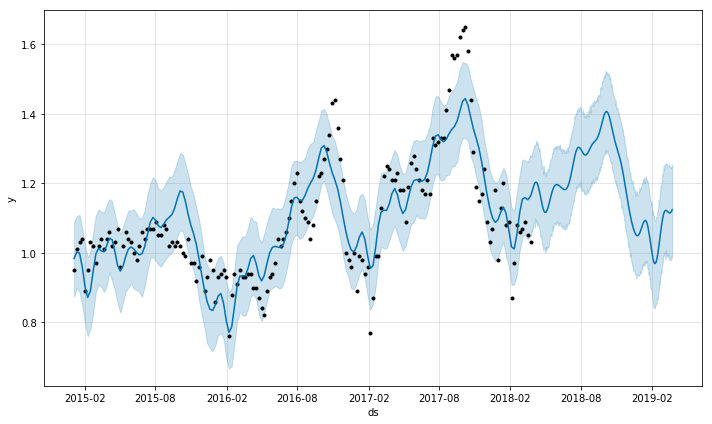

In [23]:
fig1 = model.plot(forecast)

In [0]:
# 검정색 점: 아보카도 가격
# 파란 선: 아코바도 가격의 트렌드

# 즉, 2018-02 이후에 아보카도의 가격을 예측한것


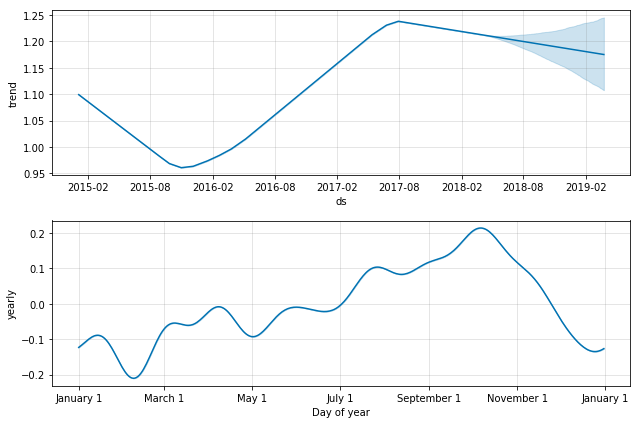

In [25]:
# Components

# 아보카도의 영향을 주는 trend, yearly를 분석해줌
fig2 = model.plot_components(forecast)